In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# Чтение датасета и разбиение на train/test

In [4]:
import pandas as pd
import numpy as np


dataset = pd.read_csv("processed_dataset.csv", index_col=0)
dataset = dataset.sample(frac=1, replace=False)

X = dataset.drop(columns="RainTomorrow").to_numpy()
X = np.hstack([X, np.zeros((len(X), 1))])  # bias
X[:, -1] = 0.1
y = dataset["RainTomorrow"].to_numpy()

X_train = X[:-20000]
y_train = y[:-20000]
X_test = X[-20000:]
y_test = y[-20000:]

# Загрузка и обучение моделей

In [5]:
from classifier import LinearClassifier

model = LinearClassifier(l2_reg_param=0.1, learning_rate=0.05, Q_param=1/len(X), gamma=0.9)
loss = model.fit(X, y, n_iters=30, batch_size=10000, stop_threshold=0.0001, weights_init_method="random", batch_generation="margin")

Initial weights: [-0.00782401 -1.42634137 -0.08000573  1.03569069 -0.01108025 -1.46600951
  0.4925755   0.1007214   0.96717678 -0.68859644  0.05262124 -0.59525355
 -0.69245114  1.04199292]
Initial Q: 2.0140803574757595
Iteration 1


100%|██████████| 2193/2193 [00:00<00:00, 64607.07it/s]


Iteration 2


100%|██████████| 2193/2193 [00:00<00:00, 48739.96it/s]


Iteration 3


100%|██████████| 2193/2193 [00:00<00:00, 56231.41it/s]


Iteration 4


100%|██████████| 2193/2193 [00:00<00:00, 42120.51it/s]


Iteration 5


100%|██████████| 2193/2193 [00:00<00:00, 59268.84it/s]


Iteration 6


100%|██████████| 2193/2193 [00:00<00:00, 54826.36it/s]


Iteration 7


100%|██████████| 2193/2193 [00:00<00:00, 68526.52it/s]


Iteration 8


100%|██████████| 2193/2193 [00:00<00:00, 66452.16it/s]


Iteration 9


100%|██████████| 2193/2193 [00:00<00:00, 44757.04it/s]


Early stopping by Q
Final weights: self.weights=array([ 0.14798758, -0.0655356 ,  0.06211047,  0.04826636,  0.20677273,
       -0.09547703,  0.11448377,  0.17887812,  0.07234903, -0.11692809,
       -0.04065605,  0.59544956,  0.20777116, -0.38704974])
Final Q: self._calculate_accurate_Q(X_train, y_train)=np.float64(0.901663745955796)


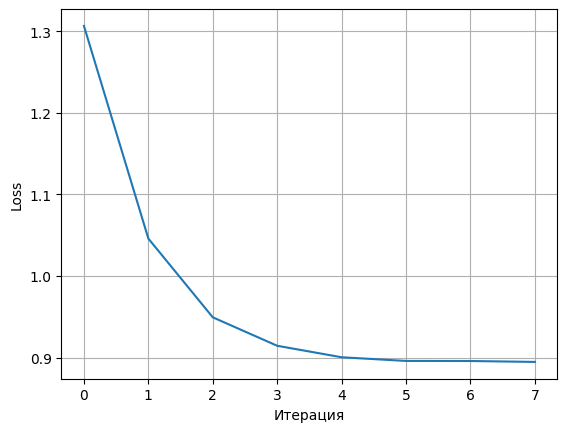

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [25]:
loss = model.fit(X, y, n_iters=30, batch_size=10000, stop_threshold=0.0001, weights_init_method="corr", batch_generation="random")

Initial weights: [ 1.84480726 -1.20351413  0.72310509  8.70210938  1.12414279 -1.67496749
 -0.15626699  0.62438412  1.10897237 -1.75053623 -0.98732183  1.78613273
  0.46340957 -5.51637563]
Initial Q: 13.45730984002315
Iteration 1


100%|██████████| 2193/2193 [00:00<00:00, 72095.66it/s]


Iteration 2


100%|██████████| 2193/2193 [00:00<00:00, 62629.26it/s]


Iteration 3


100%|██████████| 2193/2193 [00:00<00:00, 68048.45it/s]


Iteration 4


100%|██████████| 2193/2193 [00:00<00:00, 46499.25it/s]


Iteration 5


100%|██████████| 2193/2193 [00:00<00:00, 64709.34it/s]


Iteration 6


100%|██████████| 2193/2193 [00:00<00:00, 53286.23it/s]


Iteration 7


100%|██████████| 2193/2193 [00:00<00:00, 63459.74it/s]


Iteration 8


100%|██████████| 2193/2193 [00:00<00:00, 45249.80it/s]


Iteration 9


100%|██████████| 2193/2193 [00:00<00:00, 63165.15it/s]


Iteration 10


100%|██████████| 2193/2193 [00:00<00:00, 67290.27it/s]


Iteration 11


100%|██████████| 2193/2193 [00:00<00:00, 22619.51it/s]


Iteration 12


100%|██████████| 2193/2193 [00:00<00:00, 63277.26it/s]


Early stopping by Q
Final weights: self.weights=array([ 0.13103571, -0.02518077, -0.00480412,  0.03140984,  0.17060238,
       -0.24773158,  0.06196229,  0.38751556,  0.04235346, -0.28047887,
        0.01093045,  0.43607217,  0.18880438, -0.46382313])
Final Q: self._calculate_accurate_Q(X_train, y_train)=np.float64(0.8978778175809308)


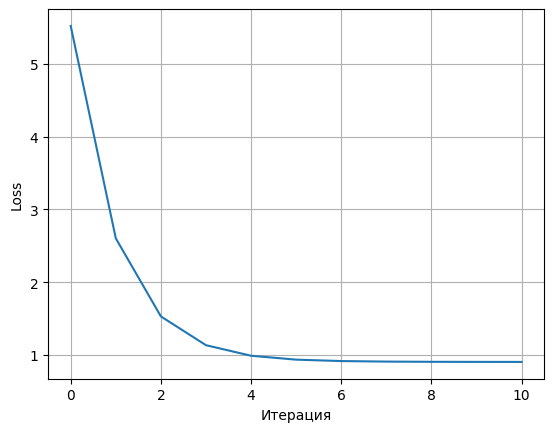

In [26]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [18]:
loss = model.fit(X, y, n_iters=30, batch_size=10000, stop_threshold=0.0001, weights_init_method="multistart", batch_generation="random", n_attempts=10)

Initial weights: [ 0.24652693 -0.32330914 -1.20094787 -0.69562291 -0.78796332  0.06634286
  0.65004185  0.69524096 -0.61112647 -0.23818468 -1.24482606  0.51594444
  0.38590272  0.40606659]
Initial Q: 1.6218556025117261
Iteration 1


100%|██████████| 2193/2193 [00:00<00:00, 47863.44it/s]


Iteration 2


100%|██████████| 2193/2193 [00:00<00:00, 64936.84it/s]


Iteration 3


100%|██████████| 2193/2193 [00:00<00:00, 55176.95it/s]


Iteration 4


100%|██████████| 2193/2193 [00:00<00:00, 53346.18it/s]


Iteration 5


100%|██████████| 2193/2193 [00:00<00:00, 50353.42it/s]


Iteration 6


100%|██████████| 2193/2193 [00:00<00:00, 88148.39it/s]


Iteration 7


100%|██████████| 2193/2193 [00:00<00:00, 47168.34it/s]


Iteration 8


100%|██████████| 2193/2193 [00:00<00:00, 53318.35it/s]


Iteration 9


100%|██████████| 2193/2193 [00:00<00:00, 48728.60it/s]


Early stopping by Q
Final weights: self.weights=array([ 0.09295997, -0.15250281,  0.0117664 ,  0.03157326,  0.31719273,
       -0.121901  , -0.02488618,  0.73885447,  0.02965606, -0.13024981,
       -0.14281554,  0.53805832,  0.03710255, -0.46859027])
Final Q: self._calculate_accurate_Q(X_train, y_train)=np.float64(0.9568218945542193)


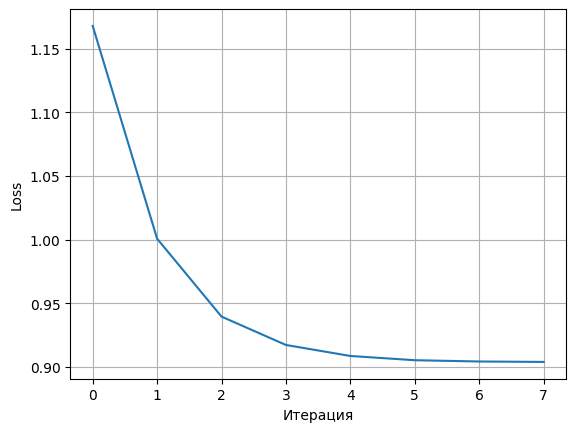

In [19]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Анализ весов модели

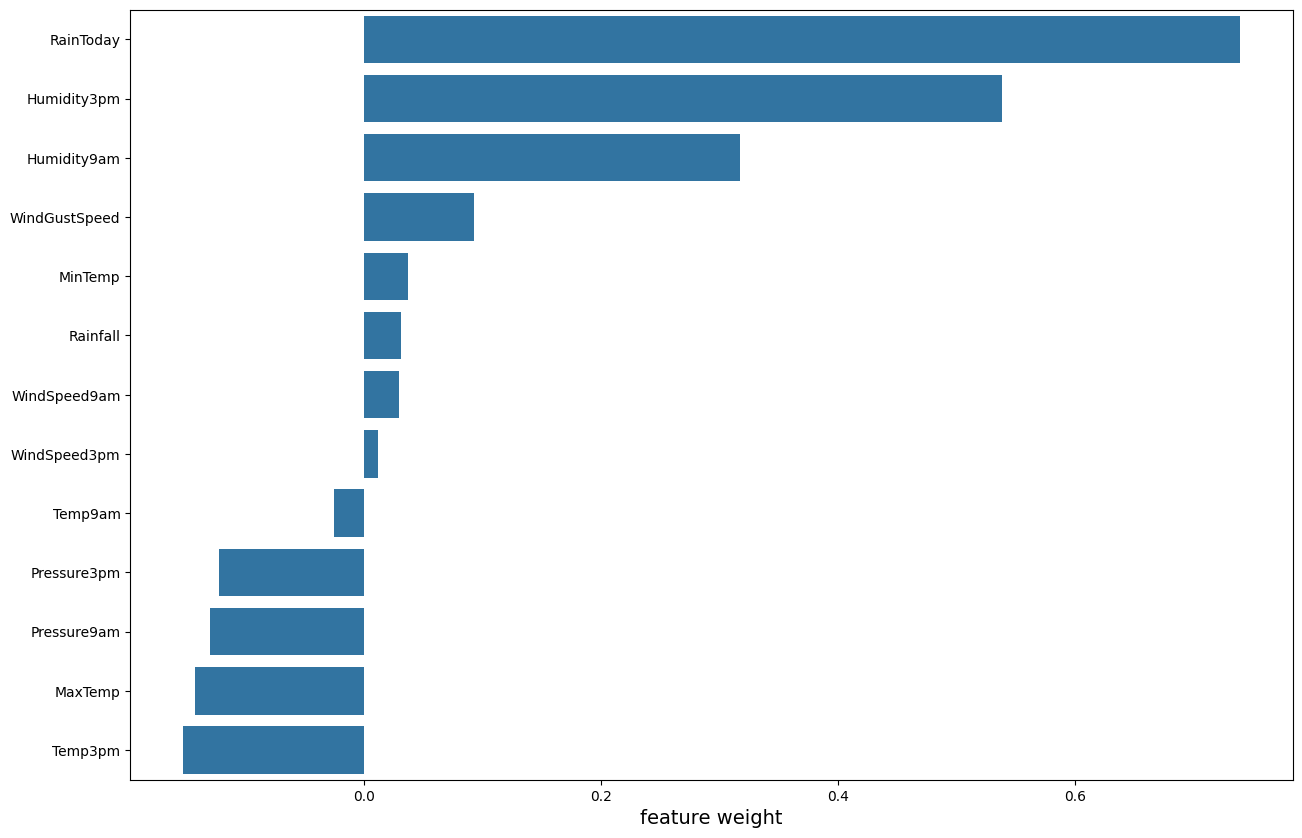

In [20]:
import seaborn as sns
import numpy as np

labels = dataset.columns.to_list()[:-1]
feature_indices = np.argsort(model.weights[:-1])[::-1]
plot = sns.barplot(y=np.array(labels)[feature_indices], x=model.weights[feature_indices])
plt.xlabel("feature weight", size="14")
plot.figure.set_size_inches(15, 10)

# Получение отступов

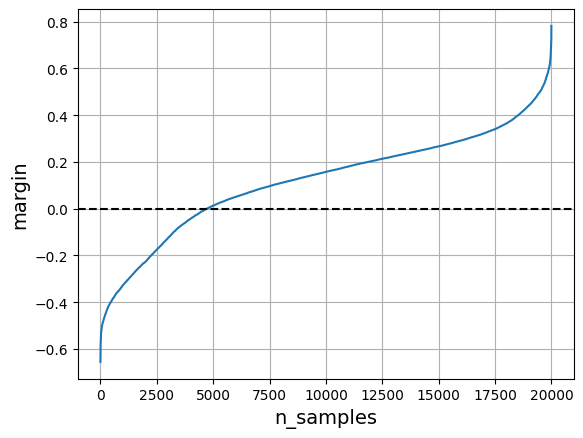

In [27]:
import matplotlib.pyplot as plt

margins = model._get_batched_margin(X_test, y_test)
margins.sort()

plt.plot(np.arange(len(margins)), margins)
plt.axline((0, 0), (2000, 0), color="black", linestyle="--")
plt.xlabel("n_samples", size="14")
plt.ylabel("margin", size="14")
plt.grid()
plt.show()

# Расчет метрик

In [22]:
from classifier import MetricsEstimator

estimator = MetricsEstimator()

In [23]:
estimator.get_metrics(y_true=y_test, y_pred=model.predict(X_test, mode="class"))

In [24]:
print(estimator)

accuracy = 0.77035
precision = 0.49271083225687395
recall = 0.5914931324767391
f1_score = 0.5376019329507702


# Обучение эталонной версии

In [206]:
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [207]:
y_pred = classifier.predict(X_test)

In [208]:
estimator.get_metrics(y_true=y_test, y_pred=y_pred)
print(estimator)

accuracy = 0.8427
precision = 0.7650440781908777
recall = 0.4407153897107529
f1_score = 0.5592602970019613
